<a href="https://colab.research.google.com/github/rbuemon/opencv/blob/master/heart_failure_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import callbacks

Using TensorFlow backend.


In [ ]:
#loading data
data_df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
data_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


**EDA**

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


[Text(0, 0, '203'), Text(0, 0, '96')]

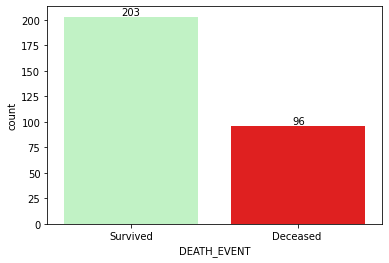

In [ ]:
cols= ["#B9FABE","#FF0000"]
ax = sns.countplot(x= data_df["DEATH_EVENT"], palette= cols)
ax.set_xticklabels(['Survived', 'Deceased '])
ax.bar_label(ax.containers[0])



In [ ]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


<AxesSubplot:>

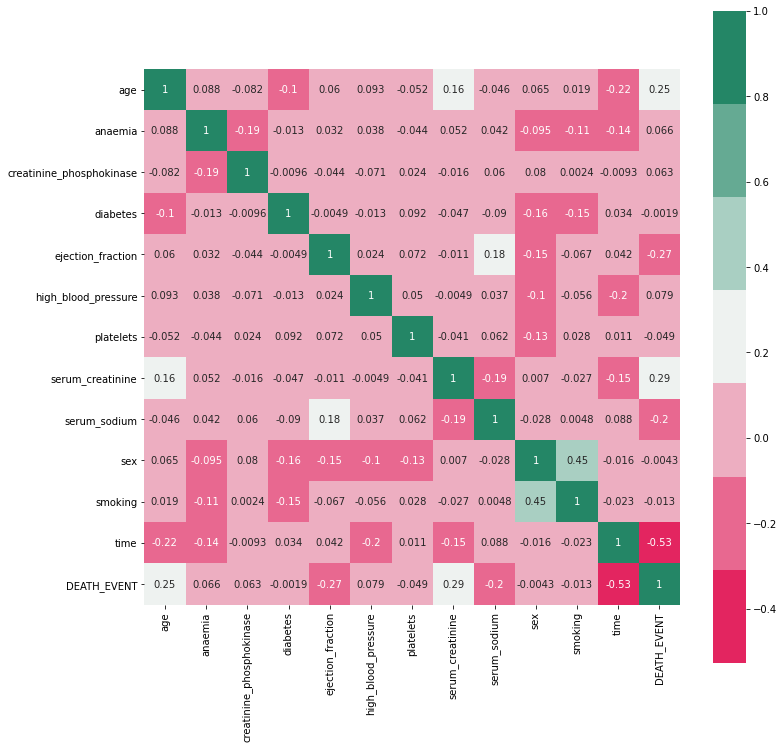

In [ ]:
cmap = sns.diverging_palette(2, 155, s=90, l=50, n=7)
corrmat = data_df.corr()
plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)

Text(0.5, 1.0, 'Distribution Of Age')

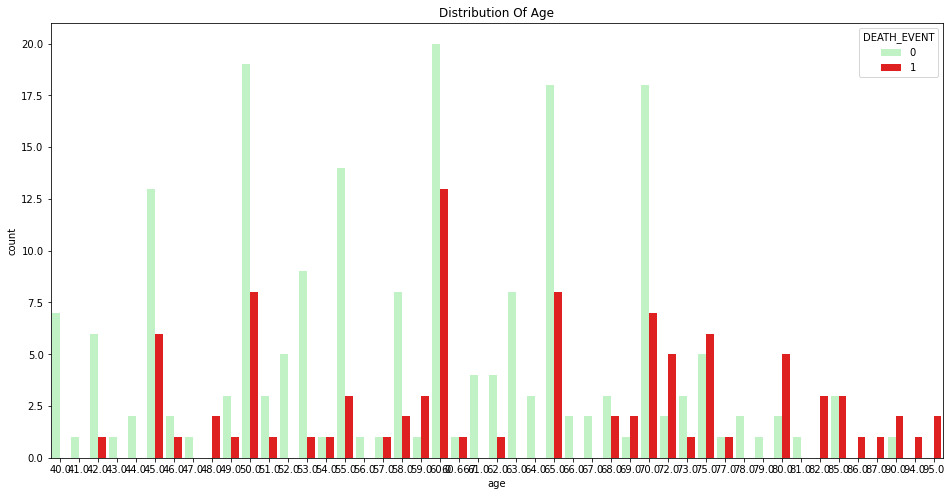

In [ ]:
plt.figure(figsize=(16,8))
Days_of_week=sns.countplot(x=data_df['age'],data=data_df, hue ="DEATH_EVENT",palette = cols)
Days_of_week.set_title("Distribution Of Age", color="black")

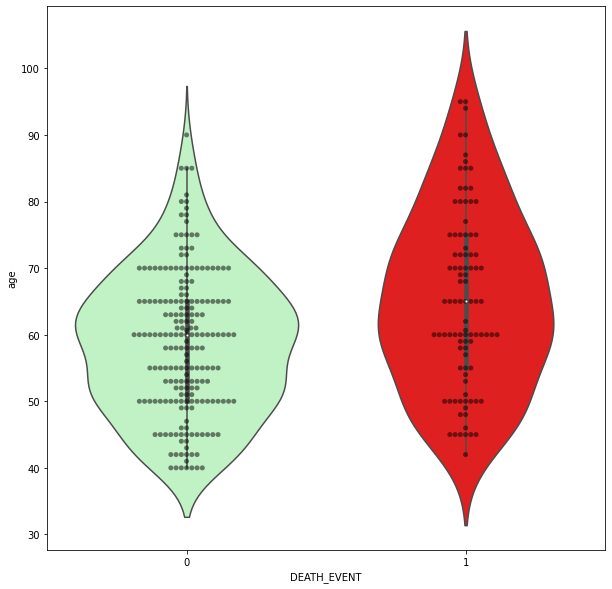

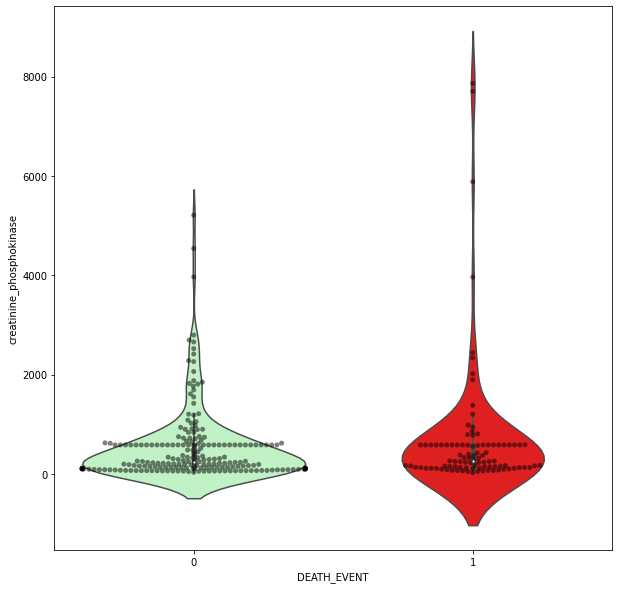

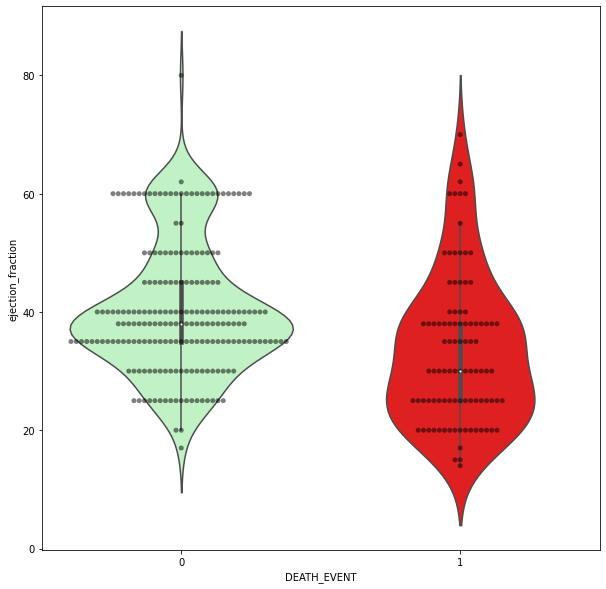

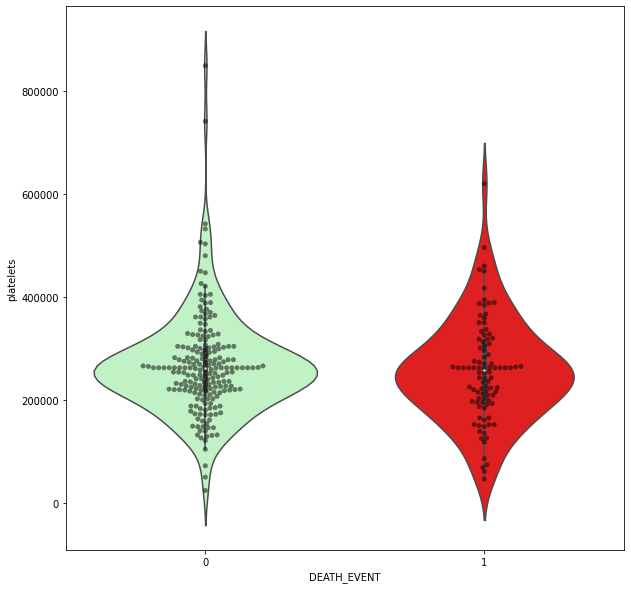

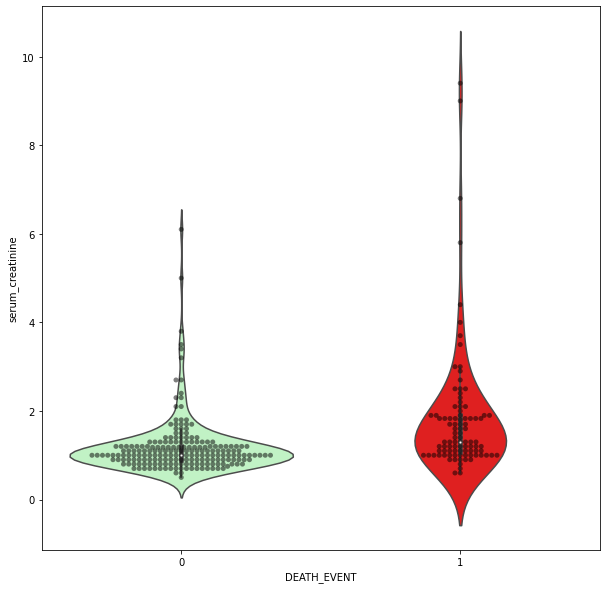

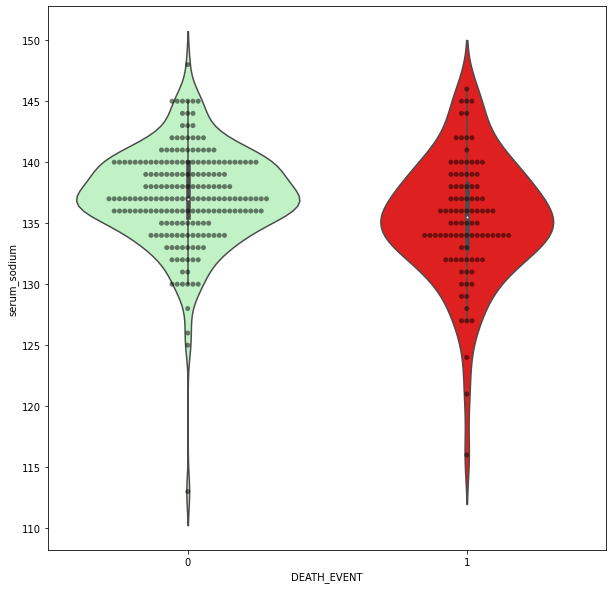

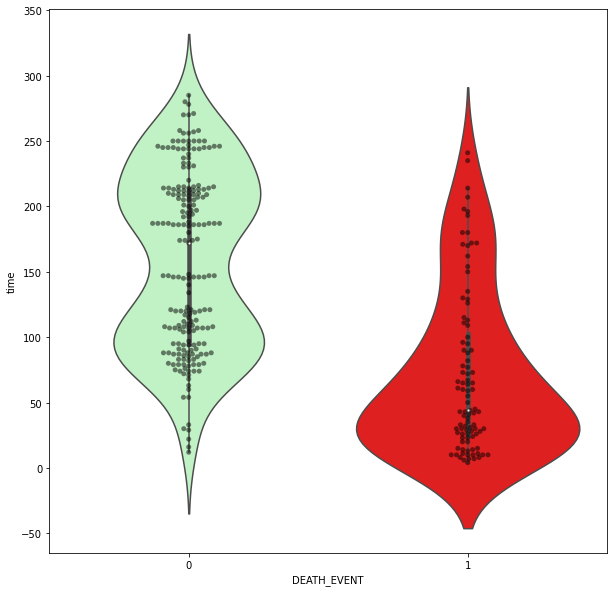

In [ ]:
feature = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium", "time"]
for i in feature:
    plt.figure(figsize=(10,10))
    sns.swarmplot(x=data_df["DEATH_EVENT"], y=data_df[i], color="black", alpha=0.5)
    sns.violinplot(x=data_df["DEATH_EVENT"], y=data_df[i], palette=cols)
    plt.show()

**DATA PREPROCESSING**

In [ ]:
X=data_df.drop(["DEATH_EVENT"],axis=1)
y=data_df["DEATH_EVENT"]

In [ ]:
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_scaled= s_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=col_names)
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.703353e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,1.009969e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,0.000000e+00,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,9.060014e-17,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,-3.267546e-17,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,0.000000e+00,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,7.723291e-17,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,1.425838e-16,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.673849e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-8.911489e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


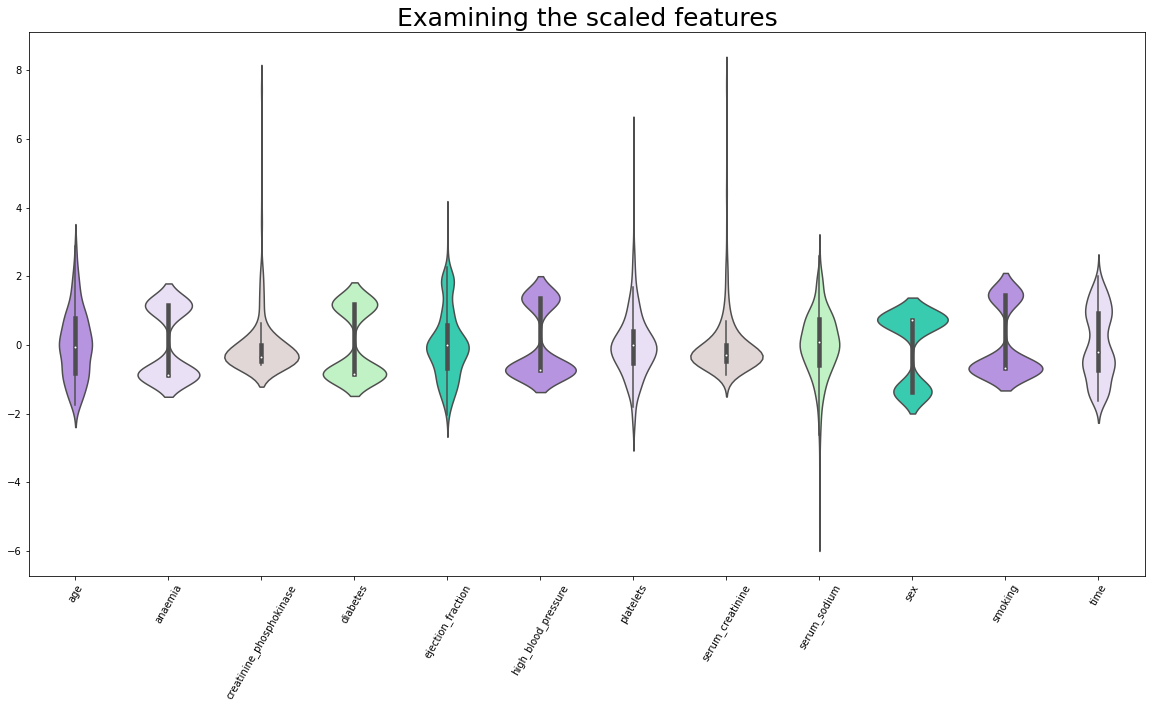

In [ ]:
colors =["#b688eb","#eadcfa","#e3d5d5","#B9FABE","#20e3c0"]
plt.figure(figsize=(20,10))
plt.title('Examining the scaled features', color="black",fontsize=25)
sns.violinplot(data = X_scaled,palette = colors)
plt.xticks(rotation=60)
plt.show()

In [ ]:
#spliting variables into training and test sets
X_train, X_test, y_train,y_test = train_test_split(X_scaled,y,test_size=0.30,random_state=25)

**Model Building**

In [ ]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=25, # how many epochs to wait before stopping
    restore_best_weights=True)

# Initializing the NN
model = Sequential()

# layers
model.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
model.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 25, epochs = 60,callbacks=[early_stopping], validation_split=0.25)

Train on 156 samples, validate on 53 samples
Epoch 1/60
156/156 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5641 - val_loss: 0.6910 - val_accuracy: 0.8302
Epoch 2/60
156/156 [==============================] - 0s 128us/step - loss: 0.6920 - accuracy: 0.6346 - val_loss: 0.6889 - val_accuracy: 0.8302
Epoch 3/60
156/156 [==============================] - 0s 122us/step - loss: 0.6911 - accuracy: 0.6346 - val_loss: 0.6869 - val_accuracy: 0.8302
Epoch 4/60
156/156 [==============================] - 0s 141us/step - loss: 0.6902 - accuracy: 0.6346 - val_loss: 0.6847 - val_accuracy: 0.8302
Epoch 5/60
156/156 [==============================] - 0s 160us/step - loss: 0.6893 - accuracy: 0.6346 - val_loss: 0.6822 - val_accuracy: 0.8302
Epoch 6/60
156/156 [==============================] - 0s 134us/step - loss: 0.6879 - accuracy: 0.6346 - val_loss: 0.6792 - val_accuracy: 0.8302
Epoch 7/60
156/156 [==============================] - 0s 141us/step - loss: 0.6863 - accuracy

Epoch 57/60
156/156 [==============================] - 0s 109us/step - loss: 0.3273 - accuracy: 0.8654 - val_loss: 0.2936 - val_accuracy: 0.8679
Epoch 58/60
156/156 [==============================] - 0s 103us/step - loss: 0.3380 - accuracy: 0.8526 - val_loss: 0.2932 - val_accuracy: 0.8679
Epoch 59/60
156/156 [==============================] - 0s 122us/step - loss: 0.3594 - accuracy: 0.8141 - val_loss: 0.2932 - val_accuracy: 0.8679
Epoch 60/60
156/156 [==============================] - 0s 103us/step - loss: 0.3382 - accuracy: 0.8397 - val_loss: 0.2936 - val_accuracy: 0.8679


In [ ]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy is', val_accuracy*100))


val_accuracy is: 86.35%


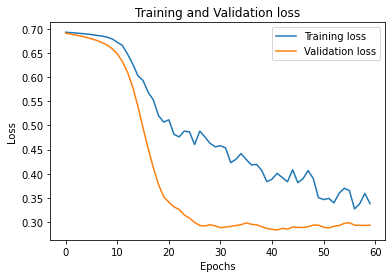

In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']], label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

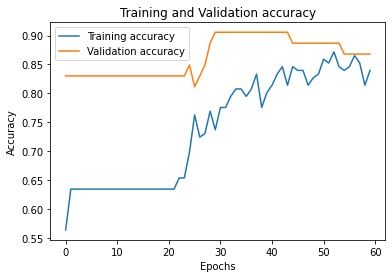

In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.4)
np.set_printoptions()

<AxesSubplot:>

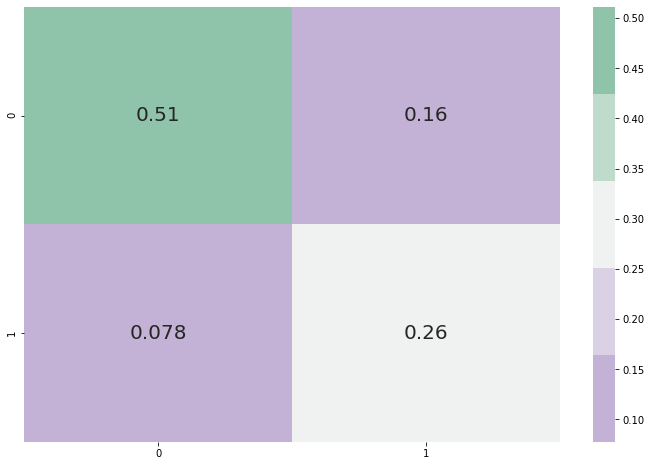

In [ ]:
# Confusion matrix
cmap1 = sns.diverging_palette(285, 150, s=40, l=75, n=5)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':20})

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.77      0.81        60
           1       0.62      0.77      0.69        30

    accuracy                           0.77        90
   macro avg       0.74      0.77      0.75        90
weighted avg       0.79      0.77      0.77        90

